In [1]:
import os

# 1. Check where you are currently
print("Current location:", os.getcwd())

# 2. Link to your project folder (Replace with YOUR specific path)
# Tip: Use forward slashes '/' even on Windows to avoid errors
project_path = "C:/Users/goelv/OneDrive/Desktop/Project1/ecommerce-segmentation-analysis"

try:
    os.chdir(project_path)
    print("Successfully linked! Now working in:", os.getcwd())
except FileNotFoundError:
    print("Error: Could not find the folder. Check the path spelling!")

Current location: C:\Users\goelv
Successfully linked! Now working in: C:\Users\goelv\OneDrive\Desktop\Project1\ecommerce-segmentation-analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This allows charts to appear directly in the notebook
%matplotlib inline

In [3]:
# Load the dataset
# Note: This might take 30-60 seconds because the file is large!
print("Loading data... please wait.")
df = pd.read_excel("C:/Users/goelv/OneDrive/Desktop/Project1/ecommerce-segmentation-analysis/Online Retail.xlsx")
display(df.head())
print("Data loaded successfully!")

Loading data... please wait.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data loaded successfully!


In [4]:
# Check the first 5 rows to see if it looks right
display(df.head())

# Check the shape (rows, columns)
print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)


In [5]:
# Check how many missing values are in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Drop rows where CustomerID is missing
df.dropna(subset=['CustomerID'], inplace=True)

# Check the shape again to see how many rows are left
print("New shape after dropping missing IDs:", df.shape)

New shape after dropping missing IDs: (406829, 8)


In [7]:
# Check how many rows have negative quantities
print("Rows with negative Quantity:", (df['Quantity'] < 0).sum())

# Filter the data to keep only positive Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print("New shape after removing returns:", df.shape)

Rows with negative Quantity: 8905
New shape after removing returns: (397884, 8)


In [8]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("Data type fixed!")
df.info()

Data type fixed!
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [9]:
# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Check the first few rows to see the new column
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
# Find the most recent date in the dataset
max_date = df['InvoiceDate'].max()

# Create a snapshot date (1 day after the max date)
import datetime as dt
snapshot_date = max_date + dt.timedelta(days=1)

print("Most recent invoice:", max_date)
print("Snapshot date for analysis:", snapshot_date)

Most recent invoice: 2011-12-09 12:50:00
Snapshot date for analysis: 2011-12-10 12:50:00


In [11]:
# Calculate Recency, Frequency, and Monetary for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency: Days since last order
    'InvoiceNo': 'nunique',                                  # Frequency: Count of unique orders
    'TotalPrice': 'sum'                                      # Monetary: Sum of all money spent
})

# Rename the columns to be clearer
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Show the first 5 customers
print("RFM Table Shape:", rfm.shape)
display(rfm.head())

RFM Table Shape: (4338, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [12]:
from sklearn.preprocessing import StandardScaler

# 1. Log Transformation to handle skewness (forcing data towards a normal distribution)
rfm_log = np.log(rfm)

# 2. Initialize the Scaler
scaler = StandardScaler()

# 3. Fit and Transform the data
rfm_normalized = scaler.fit_transform(rfm_log)

# Convert it back to a DataFrame for easier handling
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm.index, columns=rfm.columns)

# Check the result - Values should now be small (mostly between -3 and 3)
print("Data normalized successfully!")
display(rfm_normalized.head())

Data normalized successfully!


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.409894,-1.048610,3.698719
12347.0,-2.146498,1.111836,1.410201
12348.0,0.383971,0.490522,0.716419
12349.0,-0.574674,-1.048610,0.698706
12350.0,1.374758,-1.048610,-0.617446


Running K-Means testing... this might take 10-20 seconds.


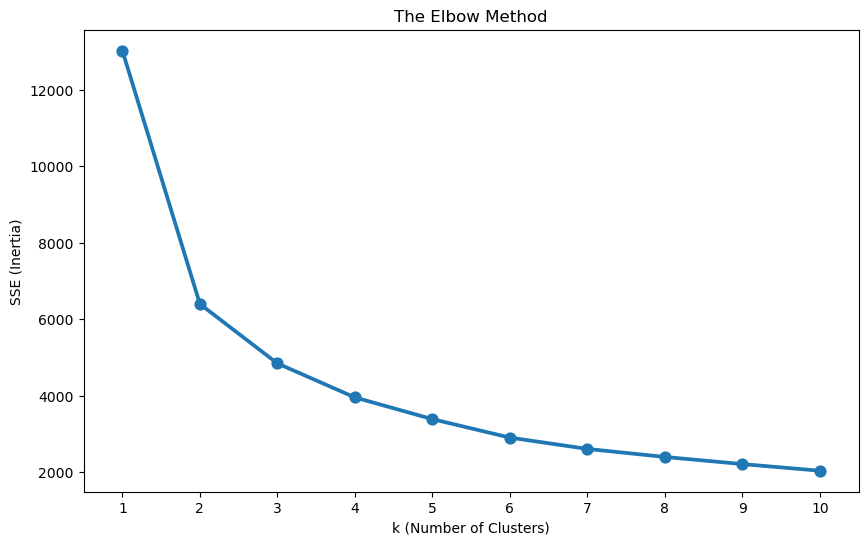

In [13]:
from sklearn.cluster import KMeans

sse = {} # Sum of Squared Errors

# Test K from 1 to 10
print("Running K-Means testing... this might take 10-20 seconds.")
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

# Plot the results
plt.figure(figsize=(10, 6))
plt.title('The Elbow Method')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('SSE (Inertia)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [14]:
# 1. Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# 2. Fit the model to the normalized data
kmeans.fit(rfm_normalized)

# 3. Assign the cluster labels back to the ORIGINAL (non-normalized) table
# This lets us see the real dollar amounts and days
rfm['Cluster'] = kmeans.labels_

# Check the result
print("Clusters assigned!")
display(rfm.head())

Clusters assigned!


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,2
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,2
12349.0,19,1,1757.55,2
12350.0,310,1,334.40,1


In [15]:
# Group by Cluster and calculate the mean for each metric
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count' # To see how many customers are in each group
}).rename(columns={'Cluster': 'Count'})

# Round the numbers to make them easier to read
display(cluster_summary.round(2))

,Recency,Frequency,Monetary,Count
Cluster,,,,
0,13.32,12.98,7581.40,787
1,161.52,1.28,340.40,1860
2,53.53,3.51,1367.06,1691


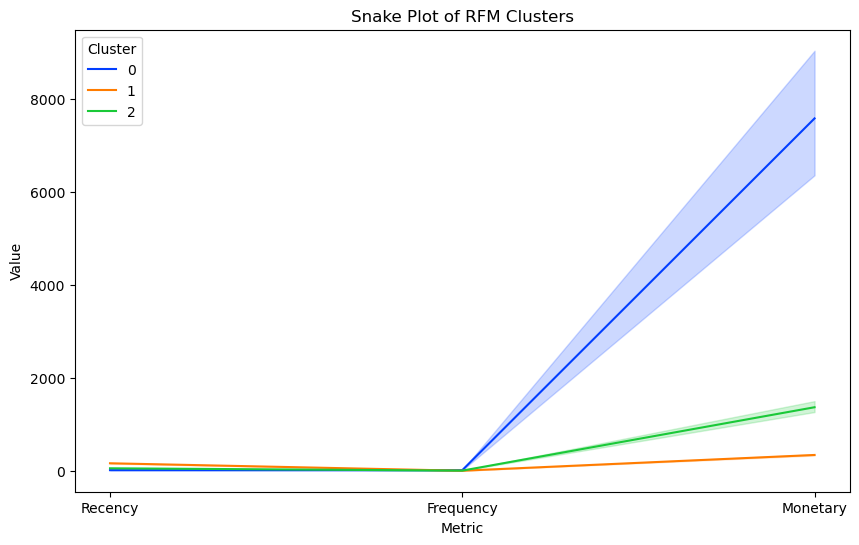

In [16]:
# Reset index to make CustomerID a column again for plotting
rfm_melted = rfm.reset_index()

# Create a "Snake Plot" (Standard industry chart for segmentation)
# First, melt the data into a long format
melted_rfm = pd.melt(rfm_melted, id_vars=['CustomerID', 'Cluster'],
                     value_vars=['Recency', 'Frequency', 'Monetary'],
                     var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Value', hue='Cluster', data=melted_rfm, palette='bright')
plt.title('Snake Plot of RFM Clusters')
plt.show()

In [17]:
# Save the final dataframe with cluster labels to a CSV file
rfm.to_csv('final_customer_segments.csv')

print("File saved! Check your folder for 'final_customer_segments.csv'")

File saved! Check your folder for 'final_customer_segments.csv'
